In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import copy

# Dataset Preprocessing

In [ ]:
raw_train = pd.read_parquet(r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\Syn-training.parquet', engine='fastparquet')
raw_test = pd.read_parquet(r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\Syn-testing.parquet', engine='fastparquet')

In [ ]:
print(raw_train['Label'].head)
raw_train.Label = raw_train.Label.map({'Benign': 0, 'Syn': 1})
raw_test.Label = raw_test.Label.map({'Benign': 0, 'Syn': 1})

raw_train.drop(['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

raw_test.drop(['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)


# normalization
def normalize(dataset):
    data = dataset.iloc[:,:-1]
    data_normalized = (data - data.mean()) / data.std()
    data_normalized['Label'] = dataset['Label']
    return data_normalized

raw_train_norm = normalize(raw_train)
raw_test_norm = normalize(raw_test)


print(raw_train['Label'].head)

test_set = raw_test_norm.to_numpy()
dataset = raw_train_norm.to_numpy()

print(dataset.shape)
dataset_1 = np.array(dataset[:1000])
dataset_2 = np.array(dataset[-1000:])
print("shape of dataset_1 : {}".format(dataset_1.shape))
print("shape of dataset_2 : {}".format(dataset_2.shape))
dataset = np.concatenate((dataset_1, dataset_2))

print(dataset.shape)


<bound method NDFrame.head of 0           Syn
1           Syn
2           Syn
3           Syn
4           Syn
          ...  
70331    Benign
70332    Benign
70333    Benign
70334    Benign
70335    Benign
Name: Label, Length: 70336, dtype: category
Categories (2, object): ['Benign', 'Syn']>
<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
70331    0
70332    0
70333    0
70334    0
70335    0
Name: Label, Length: 70336, dtype: category
Categories (2, int64): [0, 1]>
(70336, 66)
shape of dataset_1 : (1000, 66)
shape of dataset_2 : (1000, 66)
(2000, 66)


In [166]:
tes = np.isnan(dataset).any()
print('Contains NaN : ', tes)

Contains NaN :  False


In [167]:
dataset

array([[-0.3780315 , -0.96009711, -0.22208217, ..., -0.88471491,
        -0.67143204,  1.        ],
       [-0.3780315 , -0.96010037, -0.22208217, ..., -0.88471491,
        -0.67143204,  1.        ],
       [-0.3780315 ,  0.77772808, -0.04018132, ...,  0.75775448,
         0.57658218,  1.        ],
       ...,
       [-0.3780315 , -0.96009506, -0.25239898, ..., -0.88471491,
        -0.67143204,  0.        ],
       [-0.3780315 , -0.96009711, -0.25239898, ..., -0.88471491,
        -0.67143204,  0.        ],
       [-0.3780315 , -0.96009698, -0.25239898, ..., -0.88471491,
        -0.67143204,  0.        ]])

# Training Part

In [168]:
from importlib import reload
import DDoS_cic_v2
reload(DDoS_cic_v2)

from DDoS_cic_v2 import AIRS

In [169]:
AIRS_model = AIRS(train_set=dataset,
                  CLONAL_RATE=0.8,
                  HYPER_CLONAL_RATE=50,
                  CLASS_NUMBER=2,
                  MC_INIT_RATE=0.02,
                  MUTATION_RATE=0.05,
                  TOTAL_RESSOURCES=1,
                  MAX_ITER=50,
                  AFFINITY_THRESHOLD_SCALAR=1.8,
                  KNN_K= 7)



In [170]:
# AIRS_model.calculate_affinity_threshold()

# previously calculated AFTER NORM  :  0.14575724637181853
# previously calculated BEFORE NORM :  0.009475783090337002

# previously calculated for 4000 samples:  0.16222307293616095

AIRS_model.AFFINITY_THRESHOLD = 0.17520014593060115

In [ ]:
AIRS_model.train()

In [172]:
AIRS_model.Eval(test_set)

Evaluation Started
progression : 0.0 %
progression : 9.92 %
progression : 19.85 %
progression : 29.77 %
progression : 39.69 %
progression : 49.61 %
progression : 59.54 %
progression : 69.46 %
progression : 79.38 %
progression : 89.31 %
progression : 99.23 %
Evaluation Finished

Accuracy : 91.28996692392502 %


In [173]:
AIRS_model.showModelInfo()

Model Trained in  16 seconds

Dataset lenght : 2907
Trainset : 2000
Testset : 907

size of MC POOL : 1781
MC class 0 : 961
MC class 1 : 820


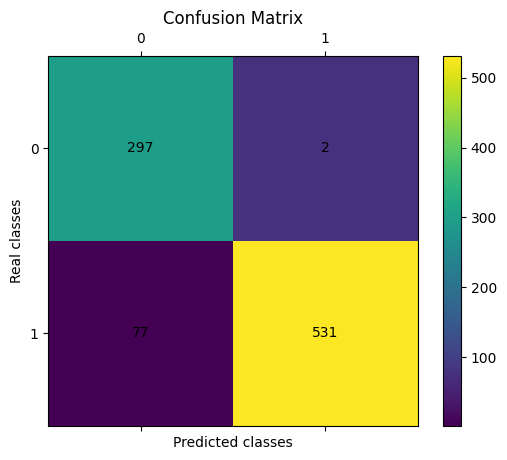

In [174]:
AIRS_model.displayConfusionMatrix()

# MC Pool Visualization

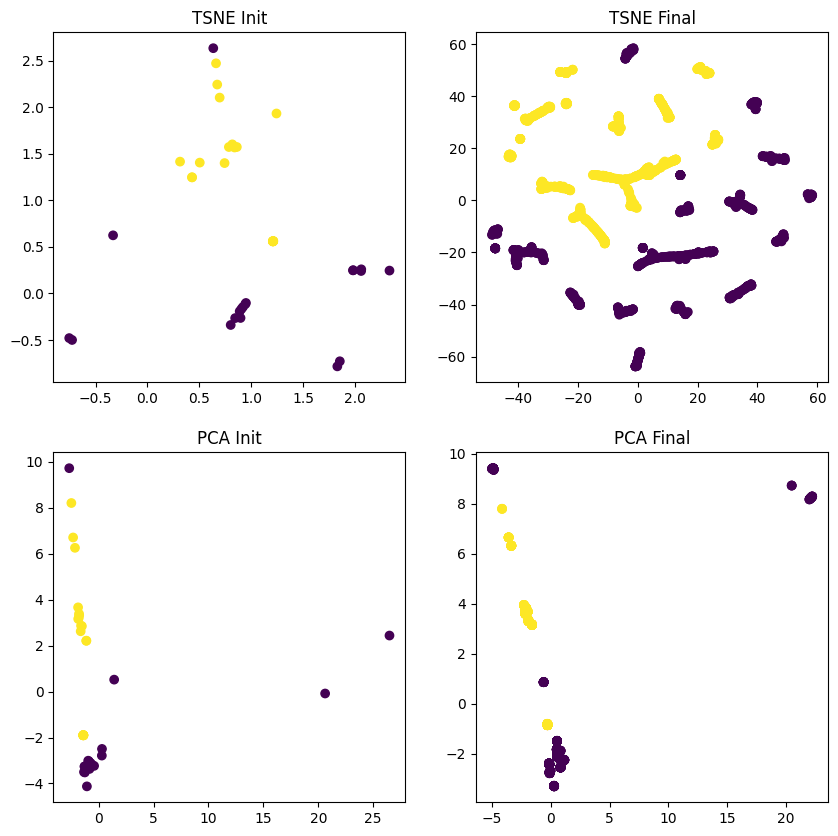

In [175]:
AIRS_model.displayEvolution()

In [176]:
for i in range(len(AIRS_model.MC_iterations)):
    break # nah

    if i % 200 != 0:
        continue

    X_iter = []
    Y_iter = []
    for key in MC_iterations[i].keys():
        for mc_cell in MC_iterations[i][key]:
            X_iter.append(mc_cell.vector)
            Y_iter.append(mc_cell._class)
    X_iter_arr = np.array(X_iter)
    Y_iter_arr = np.array(Y_iter)


    plt.figure(figsize=(10,5))

    plt.subplot(2,1,1)
    plt.title('TSNE')
    X_TSNE = TSNE(n_components=2).fit_transform(X_iter_arr)
    plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=Y_iter_arr)

    plt.subplot(2,1,2)
    plt.title('PCA')
    X_PCA = PCA(n_components=2).fit_transform(X_iter_arr)
    plt.scatter(X_PCA[:,0], X_PCA[:,1], c=Y_iter_arr)

    plt.savefig('MC_evol_{}.png'.format(i))
    plt.close()